In [2]:
import pandas as pd
import re

# Load
df = pd.read_csv('../data/phrasebank.csv', encoding='ISO-8859-1')
df.columns = ['Sentiment', 'Text']
# Clean & label
df['Sentiment'] = df['Sentiment'].str.strip().str.capitalize()
label_map = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
df['Label'] = df['Sentiment'].map(label_map)
df = df[df['Label'].notna()]

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_Text'], df['Label'], test_size=0.2, random_state=42, stratify=df['Label']
)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [4]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)


Multinomial Naive Bayes Performance:
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17       121
    Positive       0.61      0.36      0.45       273
     Neutral       0.70      0.97      0.81       575

    accuracy                           0.69       969
   macro avg       0.77      0.47      0.48       969
weighted avg       0.71      0.69      0.63       969



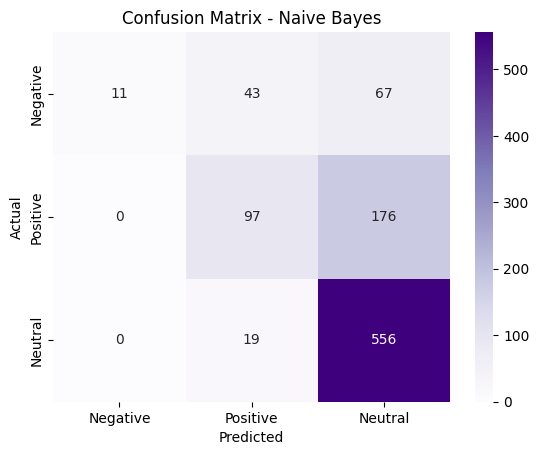

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Multinomial Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb, target_names=['Negative', 'Positive', 'Neutral']))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
